## Importing required modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
anime_df = pd.read_csv('/content/drive/MyDrive/data/anime.csv')
rating_df = pd.read_csv('/content/drive/MyDrive/data/rating.csv')

## Dataset Description

In [4]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
rating_df.sample(5)

,user_id,anime_id,rating
3087952,28546,9941,8
6273309,58473,522,7
3503344,32417,889,8
5528078,52017,8100,-1
5087163,48668,4382,9


In [6]:
anime_df.shape

(12294, 7)

In [7]:
rating_df.shape

(7813737, 3)

In [10]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [11]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [18]:
rating_df.tail()

,user_id,anime_id,rating
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9
7813736,73516,8074,9


## Data cleaning

Handling missing values

In [12]:
anime_df.isna().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


<Axes: >

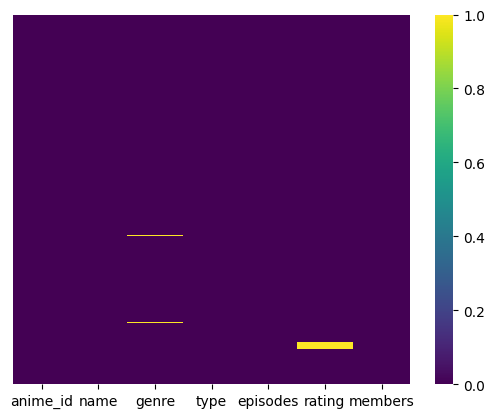

In [14]:
sns.heatmap(anime_df.isna(),cbar=True, yticklabels=False,cmap='viridis')

In [15]:
anime_df['genre'] = anime_df['genre'].fillna('unknown')

In [17]:
anime_df.dropna(subset=['type'],inplace=True)

In [21]:
anime_df.reset_index(drop=True,inplace=True)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [26]:
anime_df['rating'] = anime_df['rating'].where(pd.notnull(anime_df['rating']),None)

In [30]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12269 entries, 0 to 12268
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12269 non-null  int64  
 1   name      12269 non-null  object 
 2   genre     12269 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12269 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12269 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 671.1+ KB


In [49]:
anime_df.isna().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,205
members,0
genre_list,12269


In [36]:
rating_df.isna().sum()

,0
user_id,0
anime_id,0
rating,0


In [31]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


Handling duplicates

In [32]:
anime_df.duplicated().sum()

np.int64(0)

In [33]:
rating_df.duplicated().sum()

np.int64(1)

In [34]:
rating_df.drop_duplicates(inplace=True,ignore_index=True)

In [35]:
rating_df.duplicated().sum()

np.int64(0)

In [37]:
anime_df['genre'].head()

,genre
0,"Drama, Romance, School, Supernatural"
1,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,"Action, Comedy, Historical, Parody, Samurai, S..."
3,"Sci-Fi, Thriller"
4,"Action, Comedy, Historical, Parody, Samurai, S..."


Standardizing genre column

In [72]:
# Create a new column with list of genres
anime_df['genre_list'] = anime_df['genre'].astype(str).str.strip().str.split(',')


In [73]:
anime_df['genre_list'].head()

,genre_list
0,"[Drama, Romance, School, Supernatural]"
1,"[Action, Adventure, Drama, Fantasy, Magic,..."
2,"[Action, Comedy, Historical, Parody, Samur..."
3,"[Sci-Fi, Thriller]"
4,"[Action, Comedy, Historical, Parody, Samur..."


In [78]:
def to_lowercase_list(genre_list):
    """Converts every string in the input list to lowercase."""
    return [genre.lower() for genre in genre_list]

anime_df['genre_list'] = anime_df['genre_list'].apply(to_lowercase_list)

In [79]:
anime_df[['genre','genre_list']]

,genre,genre_list
0,"Drama, Romance, School, Supernatural","[drama, romance, school, supernatural]"
1,"Action, Adventure, Drama, Fantasy, Magic, Mili...","[action, adventure, drama, fantasy, magic,..."
2,"Action, Comedy, Historical, Parody, Samurai, S...","[action, comedy, historical, parody, samur..."
3,"Sci-Fi, Thriller","[sci-fi, thriller]"
4,"Action, Comedy, Historical, Parody, Samurai, S...","[action, comedy, historical, parody, samur..."
...,...,...
12264,Hentai,[hentai]
12265,Hentai,[hentai]
12266,Hentai,[hentai]
12267,Hentai,[hentai]


In [81]:
anime_df.to_csv('/content/drive/MyDrive/data/cleaned_anime.csv',index=False)
rating_df.to_csv('/content/drive/MyDrive/data/cleaned_ratings.csv',index=False)
